# What factors increase one's survival likelihood in the Titanic

In [170]:
# Import libraries
import sklearn 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Download data

In [171]:
import os
data_dir = '/Users/kenlam/Desktop/Data science/ML projects/project 6/titanic_pred/titanic/train.csv'
train_df = pd.read_csv(data_dir)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now that we have our data loaded in, let's explore each feature

## Data exploration

### Survived

In [172]:
df = train_df.copy()
aggregated_df = df.groupby(['Survived'])['PassengerId'].count()

Out of a total of 891 passengers, 549 did not survived while 342 survived.

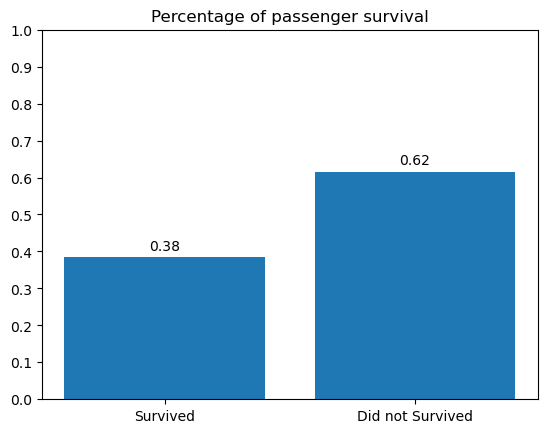

In [173]:
total_passengers = aggregated_df[0] + aggregated_df[1]
x = ['Survived', 'Did not Survived']
y = [aggregated_df[1]/ total_passengers, aggregated_df[0]/total_passengers]

bars = plt.bar(x, y)
plt.title("Percentage of passenger survival")
plt.yticks(np.arange(0.0, 1.1, 0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()
plt.show()

In our bar chart, 38% of the passengers survived while 62% did not survived.

In [174]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
groupby_gender = df.groupby('Survived')['Sex'].value_counts()

In [176]:
groupby_gender.head()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [177]:
not_survived = groupby_gender[0]
survived = groupby_gender[1]

In [178]:
percentage_not_survived = (not_survived / not_survived.sum())
percentage_survived = (survived / survived.sum())

In [179]:
print("Those who did not survived")
print(percentage_not_survived)

print("Those who did survive")
print(percentage_survived)

Those who did not survived
Sex
male      0.852459
female    0.147541
Name: count, dtype: float64
Those who did survive
Sex
female    0.681287
male      0.318713
Name: count, dtype: float64


Of those who survived, 68% were females and 32% were males.
Of those who did not survived, 85% were males and 15% were males.
This makes sense because in emergency situations, females were more likely than males to be evacuated and prioritized first.

In [180]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's see the percentages of the ticket class amongst those who survived and did not survived

In [181]:
survived = df[df['Survived'] == 1]
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [182]:
survived.groupby('Pclass')["Survived"].count()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

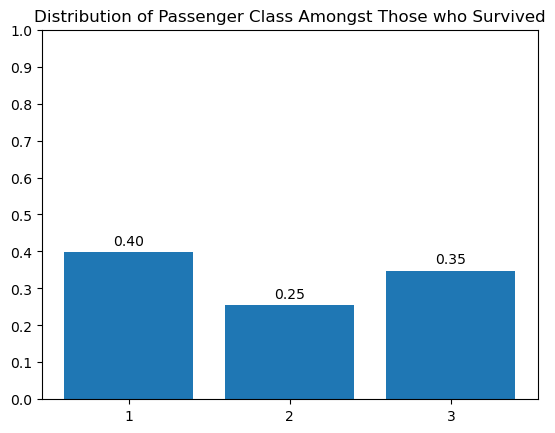

In [183]:
total_survived = survived['PassengerId'].count()
x = sorted((list(survived["Pclass"].unique()))) # store the names of the pclass
for i in range(len(x)):
    x[i] = str(x[i]) # convert to string names

y = list(survived.groupby('Pclass')["Survived"].count()) / total_survived # store the count for each class

bars = plt.bar(x, y)
plt.title("Distribution of Passenger Class Amongst Those who Survived")
plt.yticks(np.arange(0,1.1,0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

For those who have survived, 40% were a passenger class 1, 25% were in passenger class 2, and 35% were in passenger class 3.

In [184]:
not_survived = df[df['Survived'] == 0]
not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [185]:
not_survived.groupby('Pclass')["Survived"].count()

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

[0.14571949 0.17668488 0.67759563]


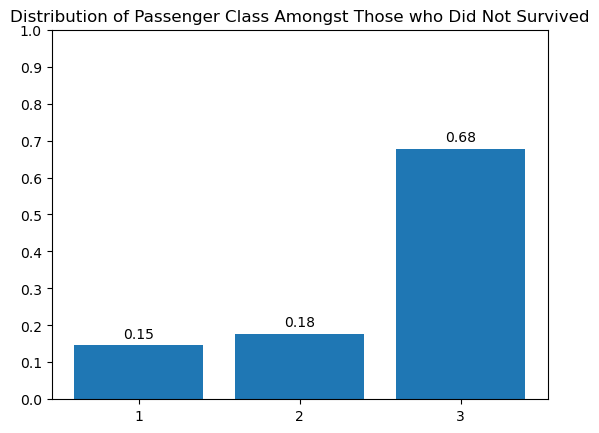

In [186]:
total_survived = not_survived['PassengerId'].count()
x = sorted((list(not_survived["Pclass"].unique()))) # store the names of the pclass
for i in range(len(x)):
    x[i] = str(x[i]) # convert to string names

y = list(not_survived.groupby('Pclass')["Survived"].count()) / total_survived # store the count for each class
print(y)

bars = plt.bar(x, y)
plt.title("Distribution of Passenger Class Amongst Those who Did Not Survived")
plt.yticks(np.arange(0,1.1,0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

Amongst those who survived, 15% were in class 1, 18% in class 2, and 68% (the majority) is in class 3.

Comparing between those who survived and did not survived, we can see that most of those who survived were in class 1 while those in the lower classes, specifically class 3, did not survive. To support this conclusion, let's do a Chi-square test to determine if one's whether one survive the Titanic depends on one's passenger class.

In [187]:
pclass_versus_survive_df = df.copy()
pclass_versus_survive_df = pclass_versus_survive_df[['Survived', 'Pclass']]
pclass_versus_survive_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [188]:
# Create a crosstab
pclass_versus_survive_cross_tab = pd.crosstab(pclass_versus_survive_df['Survived'], pclass_versus_survive_df['Pclass'])
pclass_versus_survive_cross_tab

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [189]:
# Perform the Chi-Square Independence Test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pclass_versus_survive_cross_tab)

# Print results
print(f"The p value is {p}")

The p value is 4.549251711298793e-23


Because the p value is less than 0.05, we can conclude that we found convincing evidence to support that whether or not one survive the Titanic depends on one's passenger class.

With the power of the chi-square test, let's find if there are significance in other ƒeatures that could impact one's survivability.

In [190]:
# Create a function that returns the p value from the chi-square test

def chi_square_test(col1, col2):
    cross_tab = pd.crosstab(col1, col2) # transform df into cross_tab

    chi2, p, dof, expected = chi2_contingency(cross_tab)

    if (p < 0.05):
        return p
    else:
        return "Not significant"

In [191]:
# Create a list containing the remaining columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
cols = list(df.columns)
cols = [col for col in cols if col in ["Cabin", "Sex", "Embarked"]]
print(cols)

['Sex', 'Cabin', 'Embarked']


In [193]:
p_value_list = []
for col in cols:
    p_value = chi_square_test(df['Survived'], df[col])
    if (p_value != "Not significant"):
        p_value_list.append((p_value, col))

print(p_value_list)

[(1.1973570627755645e-58, 'Sex'), (1.769922284120912e-06, 'Embarked')]


Because with a Chi-square test, we can only test for dependence among our categorical variables. We have found that one's survivability are found to have a relationship with one's sex and which port one departed from. Let's see the effect size of this relationship.

To do so, we calculate the effect size using Cramer's V

In [194]:
def crammer_v(chi2, sample_size, df):
    return np.sqrt(chi2 / (sample_size * df))

In [195]:
crammer_v_list = []
significant_cols = [col for p_value, col in p_value_list]
for col in significant_cols:
    cross_tab = pd.crosstab(df["Survived"], df[col]) # transform df into cross_tab
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    n = np.sum(cross_tab.values)
    degrees_of_freedom = min(cross_tab.shape) - 1
    print(f"Crammer's V for {col} is {crammer_v(chi2, n, degrees_of_freedom)}")

Crammer's V for Sex is 0.5409359434469282
Crammer's V for Embarked is 0.17261682709984438


Based on our crammer's V values, we can see that sex has a moderate association with one's survivability while the port for where one embarked from has a weak association with one's survivability.

In [196]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we're interested in seeing the association between fare price and other factors that could affect the price.

### Fare price

Fare price vs. Pclass

In [197]:
df2 = df.copy()
df2.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

We can see that passenger class 1 has an average fare price of $84, class 2 $20.66, and class 3 $13.68.

In [198]:
# Create a bar chart function
def create_bar(x, y, title, y_start, y_end, y_increment):
    bars = plt.bar(x, y)
    plt.title(title)
    plt.yticks(np.arange(y_start, y_end, y_increment))
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    return bars

In [199]:
df2["Fare"].max()

512.3292

<Figure size 20000x1000 with 0 Axes>

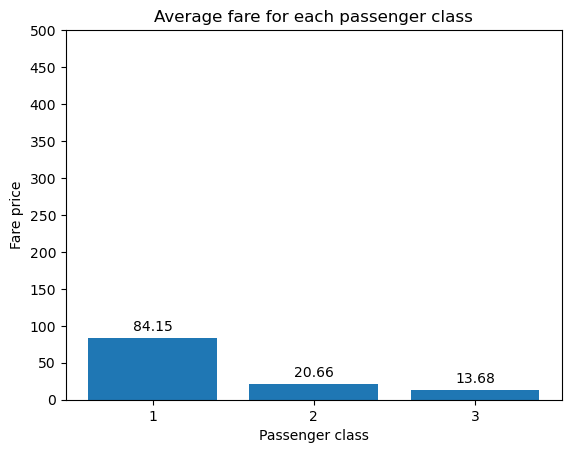

<Figure size 20000x1000 with 0 Axes>

In [200]:
x = sorted(df2['Pclass'].unique())
x = [str(pclass) for pclass in x]
y = (df2.groupby('Pclass')['Fare'].mean()).to_list()

plot = create_bar(x,y,"Average fare for each passenger class",0,df2["Fare"].max(), 50)
plt.ylabel("Fare price")
plt.xlabel("Passenger class")
plt.figure(figsize=(200,10))

Before we test to see if there's a significant diffrence in fare price between the pclass, let's assess if our distribution is normal using the Shapiro-Wilk test.

In [201]:
from scipy.stats import shapiro 

stat, p = shapiro(df2[df2['Pclass']== 1]['Fare'])
if p < 0.05:
    print(f"Significant with p value of {p}")

Significant with p value of 7.556290242780962e-19


Since we have a significant p value, that suggests that our distribution is a Gaussian distribution and is normal.

In [202]:
# ANOVA
from scipy.stats import f_oneway

f_value, p_value = f_oneway(df[df["Pclass"] == 1]["Fare"],
                                  df[df["Pclass"] == 2]["Fare"],
                                  df[df["Pclass"] == 3]["Fare"])

print(f"F value is {f_value} and p value is {p_value}")

F value is 242.34415651744814 and p value is 1.0313763209141171e-84


From our one-way ANOVA test, we can see that there is indeed significant difference in fare price among the passenger classes.

In [203]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Besies pclass, what about sex vs. fare?

In [204]:
df2.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

It seems that females are charged more in fare price than males. Let's see if this difference is significant!

In [205]:
females = df2[df2["Sex"] == 'female']
females = pd.to_numeric(females["Fare"], errors='coerce')
males = df2[df2["Sex"] == 'male']
males = pd.to_numeric(males["Fare"], errors='coerce')

females.dropna()
males.dropna()

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: Fare, Length: 577, dtype: float64

In [206]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(females, males)

print(f"T statistic is {t_statistic} and p value is {p_value}")

T statistic is 5.529140269385719 and p value is 4.230867870042998e-08


Because the t-statistic is positive, this suggests that females have a significantly higher fare price than male passengers.

What about Embarked vs. fare price?

In [207]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
df3 = df2.copy()
df3["Embarked"] = df3["Embarked"].dropna()

In [209]:
df3.groupby("Embarked")["PassengerId"].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [210]:
df3.groupby("Embarked")["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

We can see that those who left port C has the highest fare price average ($59.95), while Q has an average of $13.28 and S has an average of $27.08

Let's test for normality and do an ANOVA to see if there's any significant difference.

In [211]:
from scipy.stats import shapiro 

stat, p = shapiro(df2[df2['Embarked']== 'C']['Fare'])
if p < 0.05:
    print(f"Significant with p value of {p}")

stat, p = shapiro(df2[df2['Embarked']== 'Q']['Fare'])
if p < 0.05:
    print(f"Significant with p value of {p}")

stat, p = shapiro(df2[df2['Embarked']== 'S']['Fare'])
if p < 0.05:
    print(f"Significant with p value of {p}")

Significant with p value of 3.431393593547666e-19
Significant with p value of 1.1509565214212606e-15
Significant with p value of 1.4268459514122683e-36


In [212]:
# ANOVA
from scipy.stats import f_oneway

f_value, p_value = f_oneway(df[df["Embarked"] == 'C']["Fare"],
                                  df[df["Embarked"] == 'Q']["Fare"],
                                  df[df["Embarked"] == 'S']["Fare"])

print(f"F value is {f_value} and p value is {p_value}")

F value is 38.140305200112664 and p value is 1.2896450252631794e-16


Given the significant results from the ANOVA, we can conclude that there is indeed a significant difference in fare price among the different embarked ports.

In [213]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Last but not least, let's see if the relationship between fare price and age is significant.

In [214]:
from scipy.stats import pearsonr
df3 = df3.dropna()
age = df3["Age"]
fare = df3["Fare"]

r, p = pearsonr(age, fare)

print(f"R: {r} and p_value is {p}")


R: -0.09242385620999946 and p_value is 0.21335794745107656


Even though we have a negative relationship, the p value indicates that the relationship is not significant. Therefore, one's age doesn't significantly correlate with one's fare price.

Now that we're done with data exploration, let's move onto choosing a ML model. Because we're trying to predict a classification problem (whether or not a person survived the Titanic), the options are: logistic regression and decision trees. 

Before modeling, let's make sure our data is processed.

## Data pre-processing

In [215]:
df4 = df3.copy()
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [216]:
df4.isna().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  False  False       183
Name: count, dtype: int64

It looks like none of our data have NA values, which is good! Now we're ready to head into modeling with our pre-processed data.

## Modeling

### Logistic Regression

Let's start with a logistic regression model

Let's split our data into X (features) and y (labels)

In [217]:
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [218]:
X = df4.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df4["Survived"]

In [219]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S


In [220]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [221]:
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'], dtype=int)

In [222]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
6,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
10,4.0,1,1,16.7000,0,0,1,1,0,0,0,1
11,58.0,0,0,26.5500,1,0,0,1,0,0,0,1


Let's scale our data

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [224]:
X_scaled

array([[ 0.14906507,  0.83362754, -0.63172982, ...,  1.3473621 ,
        -0.10511767, -1.31580518],
       [-0.0432295 ,  0.83362754, -0.63172982, ..., -0.74219098,
        -0.10511767,  0.75999093],
       [ 1.17463611, -0.7230443 , -0.63172982, ..., -0.74219098,
        -0.10511767,  0.75999093],
       ...,
       [ 1.30283248, -0.7230443 ,  0.69708118, ...,  1.3473621 ,
        -0.10511767, -1.31580518],
       [-1.06880054, -0.7230443 , -0.63172982, ..., -0.74219098,
        -0.10511767,  0.75999093],
       [-0.62011321, -0.7230443 , -0.63172982, ...,  1.3473621 ,
        -0.10511767, -1.31580518]])

Let's split our data into train and test sets

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [226]:
print(X_train.shape) 
print(y_train.shape)

(146, 12)
(146,)


In [227]:
print(X_test.shape)
print(y_test.shape)

(37, 12)
(37,)


### Build a Logistic Regression Model

In [228]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [229]:
model.fit(X_train, y_train)
coefficients = model.coef_
coefficients

array([[-0.4447006 ,  0.0363792 , -0.28824739,  0.11199603,  0.11203055,
         0.05884669, -0.24030549,  0.74223368, -0.74223368,  0.22254231,
        -0.17418469, -0.18348495]])

Because sklearn doesn't have a method that allows us to print out a summary of the results where we can see which feature is significant in predicting one's survivability, we can use statsmodel library as it supports this summarization functionality.

In [230]:
# Print out the coefficients of the model
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit_regularized(method='l1', alpha=0.01)
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5386028150943495
            Iterations: 95
            Function evaluations: 95
            Gradient evaluations: 95
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  146
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                           11
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                  0.1359
Time:                        18:05:35   Log-Likelihood:                -78.611
converged:                       True   LL-Null:                       -90.972
Covariance Type:            nonrobust   LLR p-value:                   0.01001
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


/Users/kenlam/anaconda3/envs/tf/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/Users/kenlam/anaconda3/envs/tf/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


With our current features, we can see that none of them significantly predict survivability. Let's see what happens when we remove certain variables

#### Feature selection

In [231]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

rfe = RFE(estimator=model, n_features_to_select=5)

In [232]:
X_rfe = rfe.fit_transform(X_train, y_train)

In [233]:
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [ True False False False False False  True  True  True  True False False]
Feature ranking: [1 8 2 5 6 7 1 1 1 1 4 3]


Based on our feature ranking, our selected features are: age, Parch, Pclass_3, Sex_female, Sex_male

Let's test this model using just these 5 features.

In [234]:
X_train_with_selected_feature = X_train.copy()

In [235]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
6,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
10,4.0,1,1,16.7000,0,0,1,1,0,0,0,1
11,58.0,0,0,26.5500,1,0,0,1,0,0,0,1


In [236]:
features = X.columns
# Turn the X_train_with_selected_feature into a DataFrame for better seeing
X_train_with_selected_feature_df = pd.DataFrame(X_train_with_selected_feature, columns=features)

In [237]:
X_train_with_selected_feature_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.629801,-0.723044,-0.631730,-0.659091,0.397779,-0.298807,-0.240424,-0.962453,0.962453,-0.742191,-0.105118,0.759991
1,-0.427819,0.833628,-0.631730,-0.158690,0.397779,-0.298807,-0.240424,-0.962453,0.962453,-0.742191,-0.105118,0.759991
2,-2.094372,0.833628,0.697081,-0.691925,-2.513961,3.346640,-0.240424,-0.962453,0.962453,-0.742191,-0.105118,0.759991
3,-0.684211,-0.723044,-0.631730,-0.932932,-2.513961,-0.298807,4.159327,-0.962453,0.962453,-0.742191,-0.105118,0.759991
4,0.084967,0.833628,0.697081,-0.343166,0.397779,-0.298807,-0.240424,-0.962453,0.962453,-0.742191,-0.105118,0.759991


In [238]:
selected_features = []
for i in range(len(rfe.support_)):
    if (rfe.support_[i]):
        selected_features.append(features[i])

print(selected_features)

['Age', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C']


In [239]:
X_train_with_selected_feature_df = X_train_with_selected_feature_df.drop([col for col in features if col not in selected_features], axis=1)

In [240]:
X_train_with_selected_feature = X_train_with_selected_feature_df.values

In [241]:
# Print out the coefficients of the model
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_with_selected_feature)
result=logit_model.fit_regularized(method='l1', alpha=0.01)
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5431535293958859
            Iterations: 39
            Function evaluations: 39
            Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  146
Model:                          Logit   Df Residuals:                      141
Method:                           MLE   Df Model:                            4
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                  0.1285
Time:                        18:05:35   Log-Likelihood:                -79.280
converged:                       True   LL-Null:                       -90.972
Covariance Type:            nonrobust   LLR p-value:                 0.0001061
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


It seems that compared to our original model that trains on all of the features, our new model with features selected seemed to have a lower R-squared value (0.129 compared to 0.136).

In this case, let's try out a different model: decision tree!

### Building a Decision Tree

In [242]:
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [243]:
df5 = df4.copy()
df5 = df5.drop(['Name', 'PassengerId','Cabin','Ticket'],axis=1)

In [244]:
df5.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [245]:
X = df5.drop(['Survived'], axis=1)
y = df5['Survived']

In [246]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S


In [247]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

Let's convert X's columns into numerical

In [248]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S


In [249]:
d = {'female': 0, 'male': 1}
X['Sex'] = X['Sex'].map(d)

d = {'C': 0, 'S': 1, 'Q': 2}
X['Embarked'] = X['Embarked'].map(d)


In [250]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1


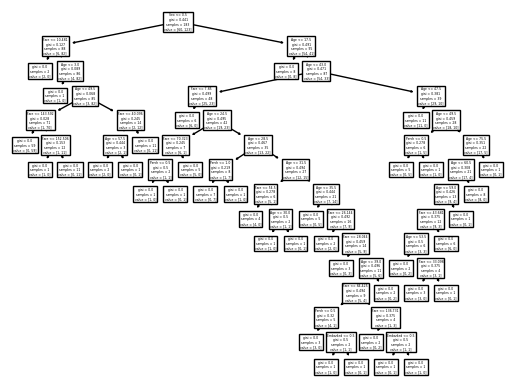

|--- feature_1 <= 0.50
|   |--- feature_5 <= 10.48
|   |   |--- class: 0
|   |--- feature_5 >  10.48
|   |   |--- feature_2 <= 3.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  3.00
|   |   |   |--- feature_2 <= 49.50
|   |   |   |   |--- feature_5 <= 143.59
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  143.59
|   |   |   |   |   |--- feature_5 <= 152.51
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  152.51
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  49.50
|   |   |   |   |--- feature_5 <= 40.10
|   |   |   |   |   |--- feature_2 <= 57.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  57.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  40.10
|   |   |   |   |   |--- class: 1
|--- feature_1 >  0.50
|   |--- feature_2 <= 17.50
|   |   |--- class: 1
|   |--- feature_2 >  17.50
|   |   |--- feature_2 <= 43.00
|   |   |   |--- feature_5 <= 7.85
|   |   |  

In [251]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features = list(X.columns)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

tree.plot_tree(dtree, feature_names = features)
plt.show()

text_representation = tree.export_text(dtree)
print(text_representation)

Let's visualize the decision tree

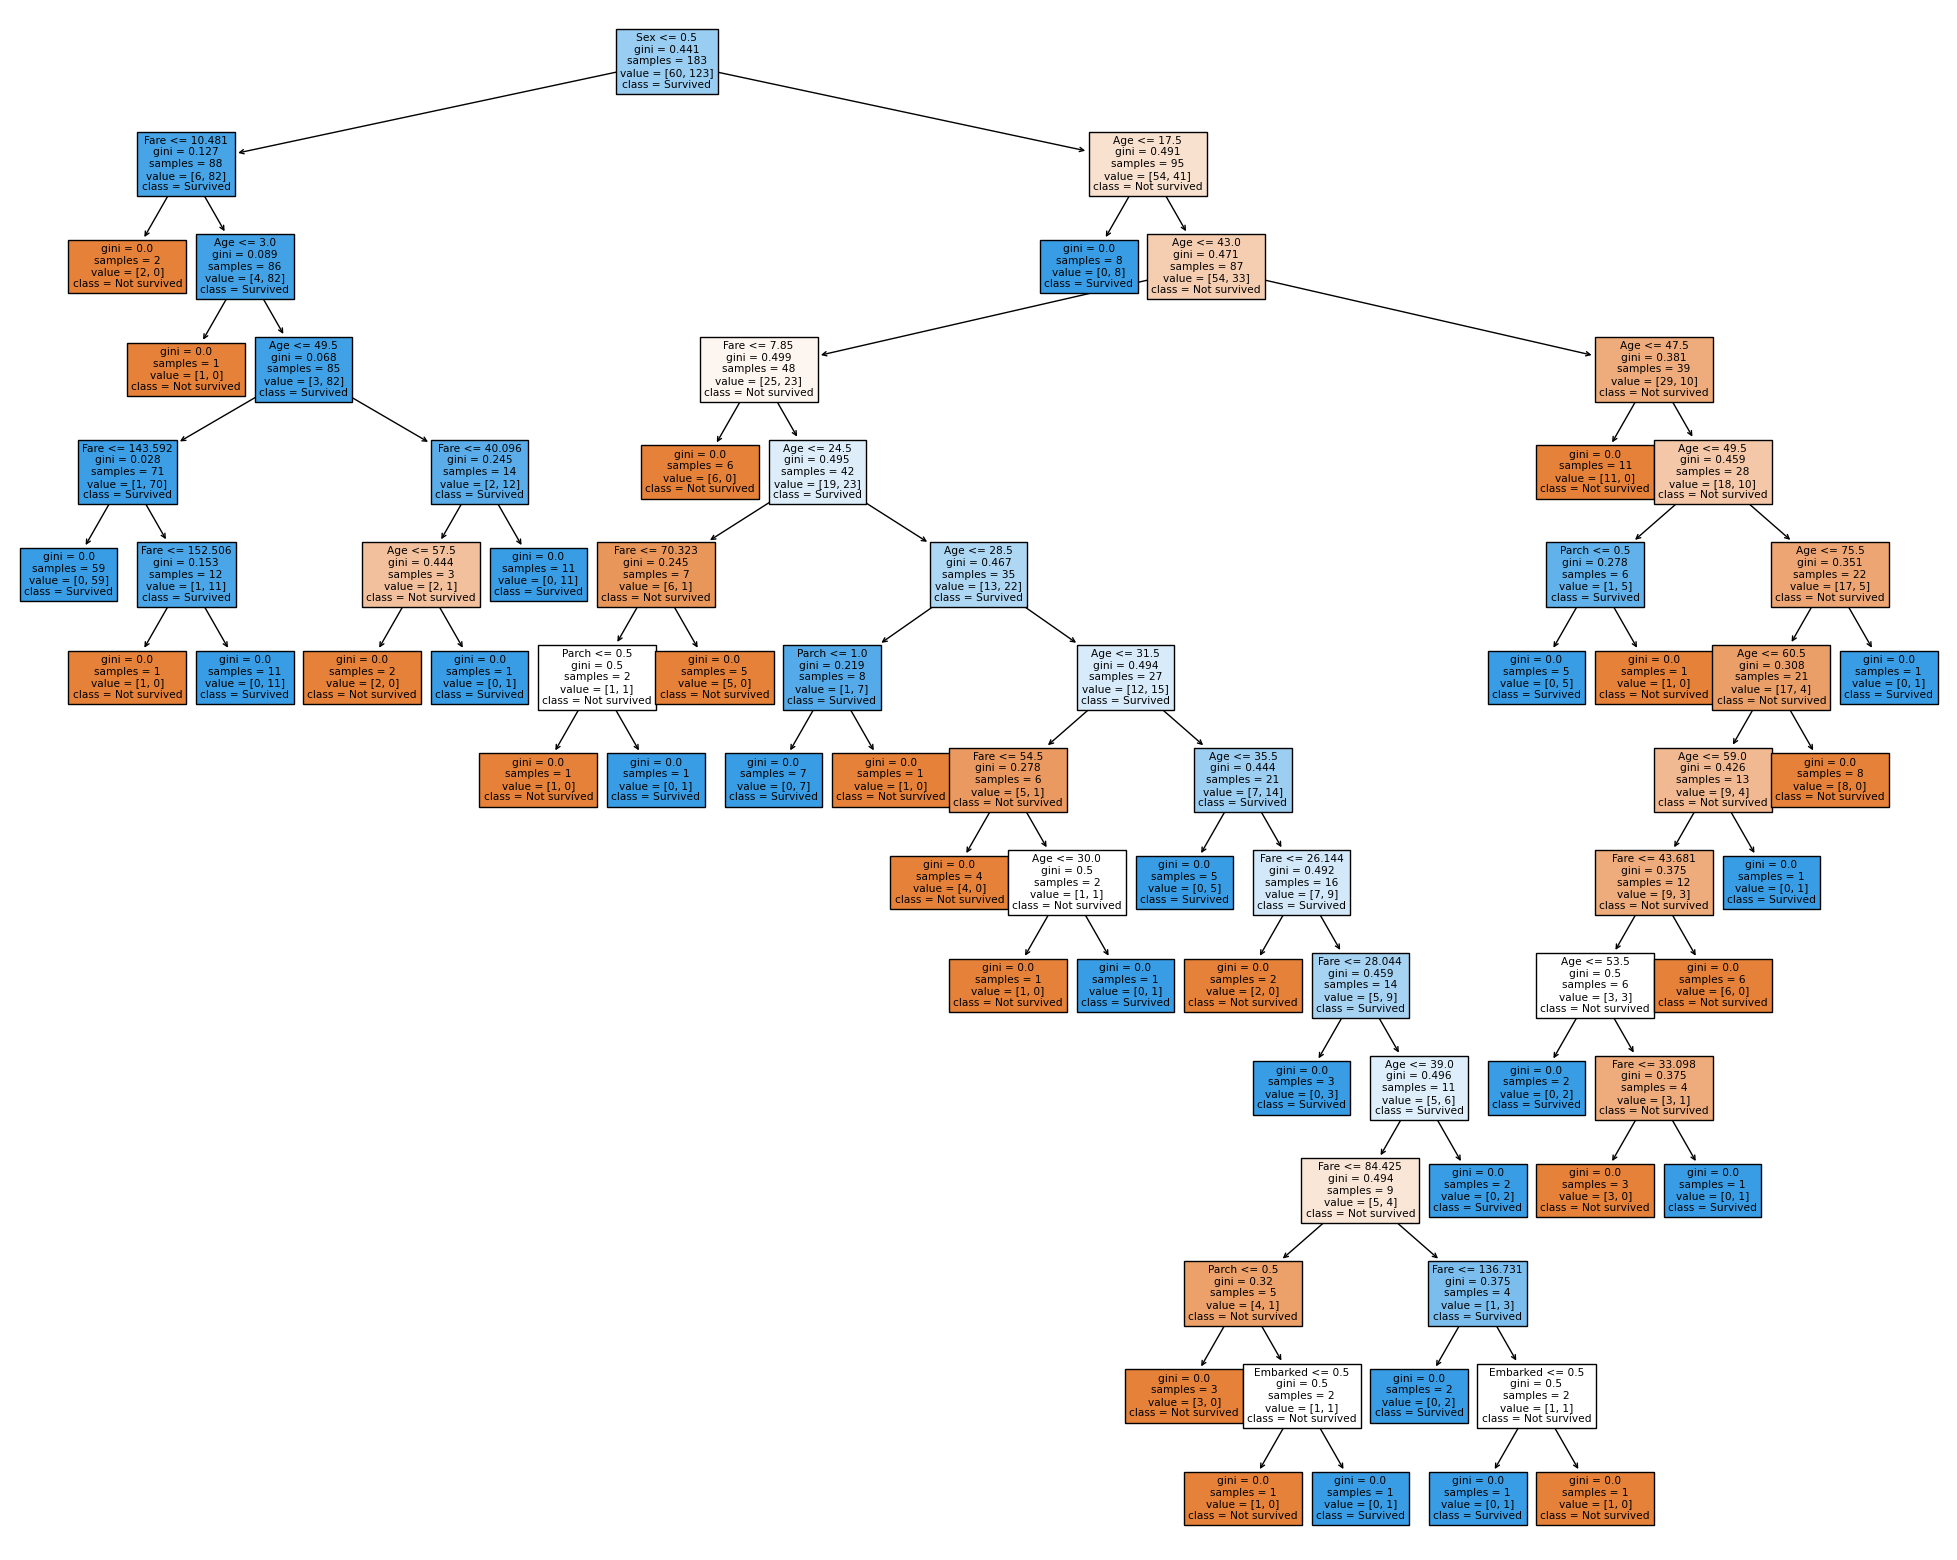

In [252]:
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(dtree,
                   feature_names=features,
                   class_names=["Not survived","Survived"],
                   filled=True)
plt.show()

Based on our decision tree, it seems that most of the decisions are made on a passenger's age, sex, and fare.

For example, those who has a fare price of greater than $40.09 and is over 57 years old are predicted to survive. While those whose age is younger than 57 is predicted to not survived.

Additionally, it seems that older female passengers whose fare price is above $152 are more likely to be predicted to survive.

These decisions of the tree are easily to be interpreted, which is why we chose this model over the logistic regression.

Before we assess our tree's accuracy, let's split our data into train and test datasets.

In [253]:
# Scale X
df5.head()
y = df5["Survived"]
X = df5.drop(['Survived'], axis=1)

In [254]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S


In [255]:
d = {'female': 0, 'male': 1}
X["Sex"] = X["Sex"].map(d)
d = {'C': 0, 'S': 1, 'Q': 2}
X["Embarked"] = X["Embarked"].map(d)

In [256]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1


In [257]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Let's convert our sets from arrays into pd for easy readability

In [259]:
features = list(X.columns)
print(features)
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


Next up, let's assess our tree's accuracy.

In [260]:
clf = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy' for the information gain criterion
    max_depth=None,          # defines the maximum depth of the tree
    min_samples_split=2,     # the minimum number of samples required to split an internal node
    min_samples_leaf=1,      # the minimum number of samples required to be at a leaf node
    max_features=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [261]:
# Create a y_prediction made by the dtree
y_pred = clf.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7027027027027027


With our current accuracy of 68%, let's try feature selection to see if we can bring the accuracy up by only selecting features that are important.

In [263]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy' for the information gain criterion
    max_depth=None,          # defines the maximum depth of the tree
    min_samples_split=2,     # the minimum number of samples required to split an internal node
    min_samples_leaf=1,      # the minimum number of samples required to be at a leaf node
    max_features=None)

rfe = RFE(estimator=model, n_features_to_select=5)

In [264]:
X_rfe = rfe.fit_transform(X_train, y_train)
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [False  True  True  True  True  True False]
Feature ranking: [3 1 1 1 1 1 2]


It seems that features (Sex, age, SibSp, Parch, Fare price) are selected to be important so let's re-evaluate our model again using just these features.

In [265]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1


In [266]:
selected_features = []
for i in range(len(rfe.support_)):
    if (rfe.support_[i]):
        selected_features.append(features[i])

print(selected_features)

['Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [267]:
X_train_with_selected_feature = X_train.drop(["Embarked", "Pclass"],axis=1)
X_test_with_selected_feature = X_test.drop(["Embarked","Pclass"],axis=1)

In [268]:
X_train_with_selected_feature.head()

,Sex,Age,SibSp,Parch,Fare
0,0.962453,0.629801,-0.723044,-0.631730,-0.659091
1,0.962453,-0.427819,0.833628,-0.631730,-0.158690
2,0.962453,-2.094372,0.833628,0.697081,-0.691925
3,0.962453,-0.684211,-0.723044,-0.631730,-0.932932
4,0.962453,0.084967,0.833628,0.697081,-0.343166


In [269]:
X_test_with_selected_feature.head()

,Sex,Age,SibSp,Parch,Fare
0,0.962453,-0.748310,-0.723044,0.697081,2.217503
1,-1.039012,-0.427819,0.833628,0.697081,-0.895993
2,-1.039012,-0.940604,2.390299,2.025892,2.412596
3,0.962453,0.918243,0.833628,-0.631730,0.364367
4,0.962453,0.790047,0.833628,-0.631730,-0.350444


In [270]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf_with_feature_selection = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy' for the information gain criterion
    max_depth=100,          # defines the maximum depth of the tree
    min_samples_split=2,     # the minimum number of samples required to split an internal node
    min_samples_leaf=1,      # the minimum number of samples required to be at a leaf node
    max_features=None)

clf_with_feature_selection.fit(X_train_with_selected_feature, y_train)

# Create a y_prediction made by the dtree
y_pred = clf_with_feature_selection.predict(X_test_with_selected_feature)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7297297297297297


It seems that with our feature selection, our accuracy increases from 67.58% to 75.68%! 

To better determine our model's reliability, let's employ a cross-validation technique.

In [271]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1


In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [273]:
X_with_selected_feature = X.drop(["Pclass", "Embarked"],axis=1)

In [274]:
from sklearn.model_selection import cross_val_score
# Using 10-fold cross-validation
scores = cross_val_score(clf_with_feature_selection, X_with_selected_feature, y, cv=10)  # cv is the number of folds
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Accuracy scores for each fold: [0.89473684 0.84210526 0.78947368 0.83333333 0.55555556 0.66666667
 0.66666667 0.72222222 0.77777778 0.88888889]
Mean accuracy: 0.7637426900584796
Standard deviation of accuracy: 0.10420028697210111


Let's see if our Random Forest Tree could help since it helps with avoiding overfitting.

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000,  # Number of trees in the forest
                                       max_depth=None,   # Maximum depth of each tree
                                       min_samples_split=2,  # Minimum number of samples required to split an internal node
                                       random_state=42)  # Seed for reproducibility

# Fit the model on the training data
rf_classifier.fit(X_train_with_selected_feature, y_train)
# Predict on the test set
predictions = rf_classifier.predict(X_test_with_selected_feature)

# Evaluate the model, e.g., using accuracy or other metrics
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7297297297297297


With our random forest tree model, our accuracy starts at a 72.97% accuracy with 1000 estimators.

In [276]:
from sklearn.model_selection import cross_val_score
# Using 10-fold cross-validation
scores = cross_val_score(rf_classifier, X_with_selected_feature, y, cv=10)  # cv is the number of folds
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Accuracy scores for each fold: [0.73684211 0.78947368 0.84210526 0.72222222 0.61111111 0.88888889
 0.66666667 0.61111111 0.83333333 0.88888889]
Mean accuracy: 0.75906432748538
Standard deviation of accuracy: 0.10060519309018894


Let's keep tuning and optimize these models to see which has a greater accuracy!

Let's employ a RandomSearchCV to hypertune the parameters of the decision model

In [277]:
from sklearn.model_selection import RandomizedSearchCV

parameters_dtree = { 'max_depth': (10,30,50,70,90),
              'criterion': ('gini', 'entropy'),
              'max_depth': (3,5,7,9,10),
              'max_features': ('sqrt', 'log2'),
              'min_samples_split': (2,4,6),
              'splitter': ("best", "random")

}

parameters_rtree = { 'max_depth': (10,30,50,70,90),
              'criterion': ('gini', 'entropy', 'log_loss'),
              'max_depth': (3,5,7,9,10),
              'max_features': ('sqrt', 'log2'),
              'min_samples_split': (2,4,6),
              }



In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dtree = DecisionTreeClassifier()
model_rtree = RandomForestClassifier()

best_dtree = RandomizedSearchCV(model_dtree,parameters_dtree,cv=10, verbose=True)
best_rtree = RandomizedSearchCV(model_rtree,parameters_rtree,verbose=True)

In [279]:
best_dtree.fit(X_train_with_selected_feature, y_train)
best_rtree.fit(X_train_with_selected_feature,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

From our grid search, here's the best parameters for our DecisionTree Classifier

In [280]:
best_dtree.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features='sqrt', splitter='random')

In [281]:
best_rtree.best_estimator_

RandomForestClassifier(max_depth=3, max_features='log2')

In [282]:
from sklearn.tree import DecisionTreeClassifier

optimized_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2')
optimized_rtree_model = RandomForestClassifier(criterion='log_loss', max_depth=3, max_features='log2', min_samples_split=4)

In [283]:
optimized_tree_model.fit(X_train_with_selected_feature, y_train)
optimized_rtree_model.fit(X_train_with_selected_feature, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=3, max_features='log2',
                       min_samples_split=4)

In [284]:
from sklearn.model_selection import cross_val_score
# Using 10-fold cross-validation
scores = cross_val_score(optimized_tree_model, X_with_selected_feature, y, cv=10)  # cv is the number of folds
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Accuracy scores for each fold: [0.63157895 0.84210526 0.84210526 0.72222222 0.61111111 0.77777778
 0.55555556 0.61111111 0.77777778 0.66666667]
Mean accuracy: 0.7038011695906433
Standard deviation of accuracy: 0.09761922635698582


In [285]:
from sklearn.model_selection import cross_val_score
# Using 10-fold cross-validation
scores = cross_val_score(optimized_rtree_model, X_with_selected_feature, y, cv=10)  # cv is the number of folds
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Accuracy scores for each fold: [0.78947368 0.78947368 0.78947368 0.77777778 0.55555556 0.88888889
 0.66666667 0.66666667 0.83333333 0.77777778]
Mean accuracy: 0.7535087719298245
Standard deviation of accuracy: 0.09166608373486734


After our GridSearchCV, we found that the mean accuracy of the random tree forest is higher than that of the decision tree model.

Let's stick with our random tree forest model and hyperparamaterize it!

In [286]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
optimize_model = RandomizedSearchCV(model, parameters, cv=10, verbose=True)
optimized_parameters = optimize_model.fit(X_train_with_selected_feature, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [288]:
optimized_parameters.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, max_features=None,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400)

In [327]:
optimized_rtree_model = RandomForestClassifier(bootstrap=False, max_depth=40, max_features=None,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400)
optimized_rtree_model.fit(X_train_with_selected_feature, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features=None,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400)

In [329]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimized_rtree_model, X_with_selected_feature,df4["Survived"], cv=10)
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Accuracy scores for each fold: [0.84210526 0.84210526 0.78947368 0.83333333 0.66666667 0.66666667
 0.61111111 0.83333333 0.83333333 0.88888889]
Mean accuracy: 0.7807017543859649
Standard deviation of accuracy: 0.09077522936350188


Our accuracy is still under 80% so let's try to implement other strategies.

We'll go back to the features to see which feature is considered as important by the model

In [331]:
X_with_selected_feature

,Sex,Age,SibSp,Parch,Fare
1,0,38.0,1,0,71.2833
3,0,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,0,4.0,1,1,16.7000
11,0,58.0,0,0,26.5500
...,...,...,...,...,...
871,0,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,0,56.0,0,1,83.1583
887,0,19.0,0,0,30.0000


In [333]:
optimized_rtree_model.feature_importances_

array([0.41356384, 0.47052136, 0.        , 0.00700046, 0.10891433])

Based on the feature importances, we see that the model finds age, passenger class, and embark location to be more important than sex, which is strange because for our other tree model, age is one of the most important factor to predict survivability.

In [335]:
cols = list(X_with_selected_feature.columns)
cols

['Sex', 'Age', 'SibSp', 'Parch', 'Fare']

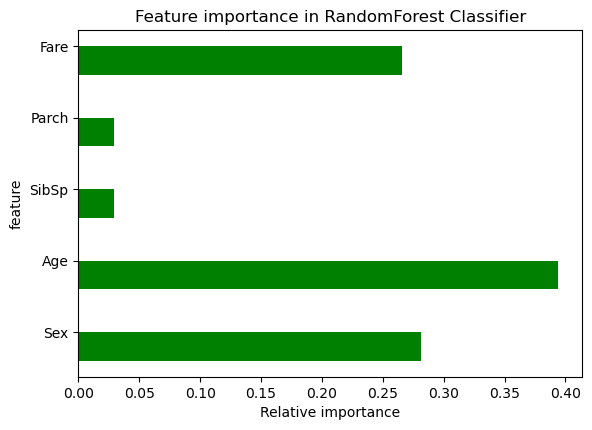

<Figure size 500x500 with 0 Axes>

In [336]:
optimized_rtree_model.feature_importances_
y_axis = optimized_rtree_model.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

Let's see what happens when we remove Parch and SibSp

In [337]:
X_train = X_train_with_selected_feature.copy()
X_train = X_train.drop(["Parch", "SibSp"],axis=1)

In [338]:
X_test = X_test_with_selected_feature.copy()
X_test = X_test.drop(["Parch","SibSp"],axis=1)

In [339]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [340]:
X_crossval = X.copy()
X_crossval = X_crossval.drop(["Parch","SibSp"], axis= 1)

In [341]:
X_crossval.head()

,Pclass,Sex,Age,Fare,Embarked
1,1,0,38.0,71.2833,0
3,1,0,35.0,53.1000,1
6,1,1,54.0,51.8625,1
10,3,0,4.0,16.7000,1
11,1,0,58.0,26.5500,1


In [342]:
X_crossval.shape

(183, 5)

In [343]:
y_crossval = df4["Survived"]

In [344]:
y_crossval

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [345]:
from sklearn.model_selection import cross_val_score
scores_optimized = cross_val_score(model, X_crossval,y_crossval, cv=10)
print("Accuracy scores for each fold:", scores_optimized)
print("Mean accuracy:", scores_optimized.mean())
print("Standard deviation of accuracy:", scores_optimized.std())

Accuracy scores for each fold: [0.84210526 0.84210526 0.84210526 0.83333333 0.55555556 0.77777778
 0.66666667 0.77777778 0.88888889 0.83333333]
Mean accuracy: 0.7859649122807018
Standard deviation of accuracy: 0.09591178133709367


when removing the variables Parch and SibSp, we found that our accuracy jumed to 0.79% by looking at feature importance.